# Descriptive Analysis of Sentiment Analysis for Mental Health Dataset

## Introduction

This notebook explores the **Sentiment Analysis for Mental Health** dataset from Kaggle, which contains user-generated textual statements labeled with mental health conditions such as depression, anxiety, stress, and others. The goal is to understand the dataset's structure, class distributions, and key characteristics before building predictive models.

**Descriptive analysis** involves summarizing and visualizing essential features of the dataset, including field types, missing values, label/class distributions, text properties, and example entries. This step provides valuable context for data quality assessment and guides further analysis and modeling decisions.

## 1. Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style("whitegrid")
print("Library imports complete.\n")

Library imports complete.



## 2. Loading the Dataset

In [22]:
print("Starting dataset load and validation...")
start = time.time()
try:
    df = pd.read_csv('Sentiment Analysis for Mental Health Dataset.csv')
    print(f"✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns (Completed in {time.time()-start:.2f}s)")
except FileNotFoundError:
    print("✗ ERROR: Dataset not found.")
    raise
except Exception as e:
    print(f"✗ Unexpected error: {e}")
    raise

Starting dataset load and validation...
✓ Dataset loaded: 53043 rows, 3 columns (Completed in 0.34s)


## 3. Basic Dataset Overview
Inspect the shape, columns, and initial rows for basic quality checks.

In [24]:
print("Starting basic dataset overview...")
start = time.time()
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Sample rows:\n", df.head())
print(f"✓ Dataset overview complete (Time taken: {time.time()-start:.2f}s)\n")

Starting basic dataset overview...
Shape: (53043, 3)
Columns: Index(['Unnamed: 0', 'statement', 'status'], dtype='object')
Sample rows:
    Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety
✓ Dataset overview complete (Time taken: 0.01s)



## 4. Checking for Missing Values
Summarize missing values for each field to inform later cleaning steps.

In [26]:
print("Checking missing values in dataset...")
start = time.time()
missing = df.isnull().sum()
print("Missing Values:\n", missing)
print(f"✓ Missing value check complete (Time taken: {time.time()-start:.2f}s)\n")

Checking missing values in dataset...
Missing Values:
 Unnamed: 0      0
statement     362
status          0
dtype: int64
✓ Missing value check complete (Time taken: 0.01s)



## 5. Field Types and Unique Values
Report the type and number of unique values in each column.

In [28]:
print("Summarizing field types and unique values...")
start = time.time()
for col in df.columns:
    print(f"{col} - Unique Values:", df[col].nunique())
print(f"✓ Field summary complete (Time taken: {time.time()-start:.2f}s)\n")

Summarizing field types and unique values...
Unnamed: 0 - Unique Values: 53043
statement - Unique Values: 51073
status - Unique Values: 7
✓ Field summary complete (Time taken: 0.04s)



## 6. Label/Class Distribution
Visualize and report the balance of mental health status labels.

Plotting label/class distribution...


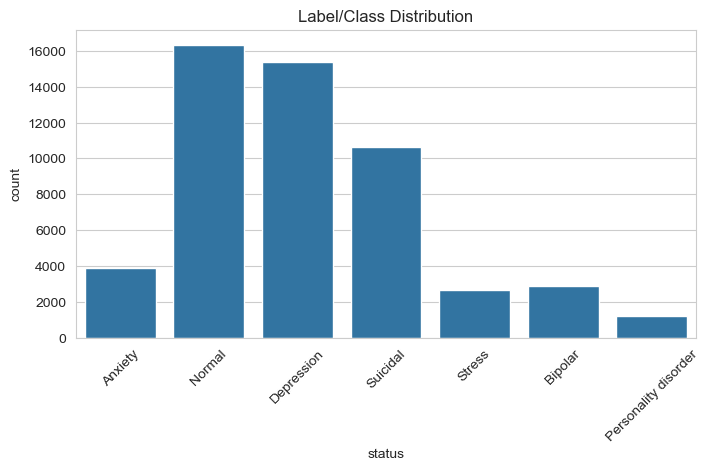

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64
✓ Label distribution plot (Time taken: 0.32s)



In [30]:
print("Plotting label/class distribution...")
start = time.time()
plt.figure(figsize=(8,4))
sns.countplot(x="status", data=df)
plt.title("Label/Class Distribution")
plt.xticks(rotation=45)
plt.show()
print(df['status'].value_counts())
print(f"✓ Label distribution plot (Time taken: {time.time()-start:.2f}s)\n")

*Decision Note: Class distribution impacts model selection and evaluation strategies.*

## 7. Analysis of Text Length
Explore and visualize length of user statements to detect outliers and biases.

Analyzing statement text length...


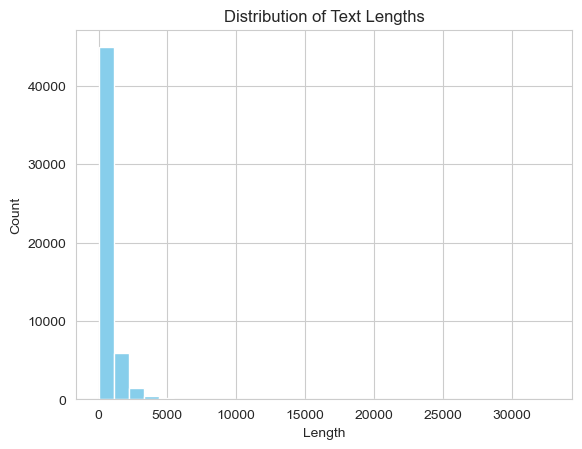

Mean length: 574.7848160926042
Max length: 32759
✓ Text length analysis completed (Time taken: 0.19s)



In [34]:
print("Analyzing statement text length...")
start = time.time()
df['textlength'] = df['statement'].astype(str).apply(len)
plt.hist(df['textlength'], bins=30, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()
print("Mean length:", df['textlength'].mean())
print("Max length:", df['textlength'].max())
print(f"✓ Text length analysis completed (Time taken: {time.time()-start:.2f}s)\n")

*Decision Note: Disproportionate text lengths may indicate quality problems or labeling inconsistencies.*

## 8. Example Entries by Class
Display one sample statement from each mental health category for interpretability and manual inspection.

In [36]:
for label in df['status'].unique():
    print(f"\nExample for {label}:")
    example = df[df['status'] == label]['statement'].iloc[0]
    print(example)
print("✓ Example entries displayed.\n")


Example for Anxiety:
oh my gosh

Example for Normal:
Gr gr dreaming of ex crush to be my game, God

Example for Depression:
I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?

Example for Suicidal:
I am so exhausted of this. Just when I think I can finally rest, just when I think maybe things are starting to settle, another hurdle comes flying at me. This month alone we found out my mum could be dying, my girlfriend left me, my parents revealed that they wanted a divorce, my grandad was hospitalised a

## 10. Exporting Summary Statistics
Save descriptive summary statistics for all fields to CSV for documentation and future reference.

In [38]:
print("Exporting summary statistics...")
start = time.time()
summary = df.describe(include='all')
summary.to_csv('dataset_summary.csv')
print(summary)
print(f"✓ Summary export completed (Time taken: {time.time()-start:.2f}s)\n")

Exporting summary statistics...
          Unnamed: 0          statement  status    textlength
count   53043.000000              52681   53043  53043.000000
unique           NaN              51073       7           NaN
top              NaN  what do you mean?  Normal           NaN
freq             NaN                 22   16351           NaN
mean    26521.000000                NaN     NaN    574.784816
std     15312.339501                NaN     NaN    844.707198
min         0.000000                NaN     NaN      2.000000
25%     13260.500000                NaN     NaN     77.000000
50%     26521.000000                NaN     NaN    313.000000
75%     39781.500000                NaN     NaN    748.000000
max     53042.000000                NaN     NaN  32759.000000
✓ Summary export completed (Time taken: 0.06s)



*Decision Note: Exporting ensures reproducibility and easy collaboration.*